# T1 – Arduino: Aquisição, Tratamento e Visualização de Dados de Sensor


## Sketch Arduino:

A primeira abordagem que considerei foi utilizar o Arduino para a recolha de dados utilizando o sensor de temperatura dht11:

Os componentes utilizados foram:
- Arduino UNO;
- Resistencia de 10K ohm;
- Sensor DHT11;
- BreadBoard;

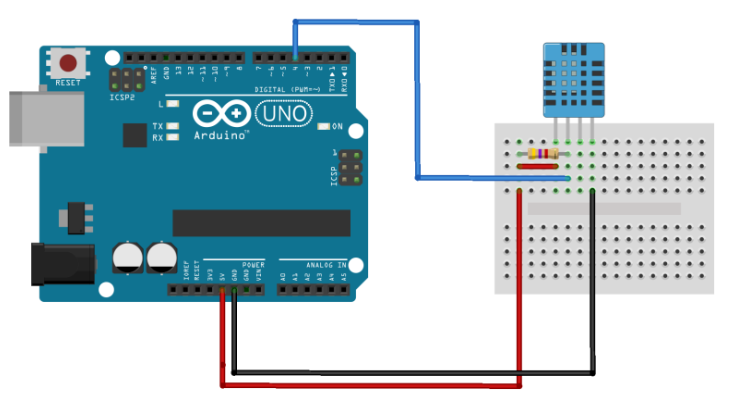

O seguinte Snipped de codigo apresenta o codigo utilizado para a recolha de de dados do sensor de temperatura.

In [ ]:
#include <dht11.h>
#define DHT11PIN 4

dht11 DHT11;

void setup()
{
  Serial.begin(9600);
}

void loop()
{
  Serial.println();

  int chk = DHT11.read(DHT11PIN);

  Serial.print("Time: ");
  Serial.print(millis() / 1000); // Convert milliseconds to seconds
  Serial.println("s");

  Serial.print("Humidity (%): ");
  Serial.println((float)DHT11.humidity, 2);

  Serial.print("Temperature (C): ");
  Serial.println((float)DHT11.temperature, 2);

  Serial.println(); // Add a newline character

  delay(2000);
}


### Recolher dados do Arduino Atravez da Porta Serial.

In [10]:
import serial
import pandas as pd

# Open the serial port
ser = serial.Serial('COM6', 9600)

# Create empty lists to store the data
time_list = []
temperature_list = []
humidity_list = []

try:
    # Read 10 samples of data from Arduino and store it in lists
    for _ in range(10):
        line = ser.readline().decode().strip()
        data = line.split(',')
        if len(data) == 3:
            time_list.append(int(data[0]))
            temperature_list.append(float(data[1]))
            humidity_list.append(float(data[2]))

except KeyboardInterrupt:
    print('Keyboard Interrupt by user')

finally:
    # Close the serial port
    ser.close()

# Create a DataFrame from the lists
df = pd.DataFrame({'Time': time_list, 'Temperature': temperature_list, 'Humidity': humidity_list})

# Save the DataFrame to a CSV file
df.to_csv('dados_sensor_raw.csv', index=False)

# Inform that the program has finished saving the data
print('Data saved into dados_sensor_raw.csv. Program finished.')


Data saved into dados_sensor_raw.csv. Program finished.
